In [1]:
#Author: abhishek.sawalkar@rutgers.edu
#Script: To find the common genes across different subtypes and then map it to diff gene expression log2fold change and padj values
#env : env_ml

In [11]:
#Import libraries
import pandas as pd

In [12]:
# result_path = './results/co-op_learning/results_subtype_vs_control_consistency_final'
result_path = './results/co-op_learning/results_adjusted_subtype_vs_control_consistent'
et_file = result_path + "/ET_FeatureCounts.csv"
pv_file = result_path + "/PV_FeatureCounts.csv"
mf_file = result_path + "/mf_FeatureCounts.csv"

et_data = pd.read_csv(et_file)
pv_data = pd.read_csv(pv_file)
mf_data = pd.read_csv(mf_file)

et_genes = set(et_data.iloc[:,0])
pv_genes = set(pv_data.iloc[:,0])
mf_genes = set(mf_data.iloc[:,0])
common_genes = et_genes & pv_genes & mf_genes

In [45]:
et_genes

{'X_ADSL',
 'X_AGL',
 'X_AKAP2',
 'X_AKT2',
 'X_ALDH1A2',
 'X_ALDOC',
 'X_ALKBH3',
 'X_ANKH',
 'X_APOPT1',
 'X_APTR',
 'X_ARL3',
 'X_ATMIN',
 'X_ATP1B1',
 'X_ATP6V1B2',
 'X_BBOF1',
 'X_BCKDHB',
 'X_BICD1',
 'X_BUD31',
 'X_BZW2',
 'X_C11orf96',
 'X_C15orf54',
 'X_C1orf21',
 'X_C2CD3',
 'X_CA2',
 'X_CABLES1',
 'X_CBFB',
 'X_CCDC134',
 'X_CCDC85A',
 'X_CCDC85C',
 'X_CCSAP',
 'X_CCSER1',
 'X_CD151',
 'X_CD28',
 'X_CD46',
 'X_CD59',
 'X_CD96',
 'X_CHMP4A',
 'X_CKS1B',
 'X_CMTM7',
 'X_CNTD2',
 'X_COLQ',
 'X_COPS3',
 'X_COQ5',
 'X_CRHR2',
 'X_CRYM',
 'X_CTSC',
 'X_CTSW',
 'X_DDX41',
 'X_DSTN',
 'X_EFCC1',
 'X_EFNB2',
 'X_EIF3J',
 'X_EIF5',
 'X_ELOVL6',
 'X_ENTPD3',
 'X_EVI2A',
 'X_F5',
 'X_FAM189A2',
 'X_FCGR2A',
 'X_FIRRE',
 'X_FLOT1',
 'X_FLOT1.3',
 'X_FLOT1.4',
 'X_FLOT1.6',
 'X_FMR1',
 'X_FOLR1',
 'X_GABRB2',
 'X_GFRA3',
 'X_GGT1',
 'X_GLOD5',
 'X_GMCL1',
 'X_GRHL1',
 'X_GRSF1',
 'X_GTF2A2',
 'X_GTF2H1',
 'X_HEMGN',
 'X_HIPK1',
 'X_HIST1H4J',
 'X_HIST2H2BF',
 'X_HPSE',
 'X_HSD17B12',
 'X_

### Result: Common Genes

In [13]:
common_genes

{'X_BICD1',
 'X_C15orf54',
 'X_C1orf21',
 'X_FMR1',
 'X_LINC01686',
 'X_LOC100130476',
 'X_NAT9',
 'X_P2RY10',
 'X_PIK3C2A',
 'X_PIK3CG',
 'X_PMF1',
 'X_SMAD1',
 'X_TXN2',
 'X_VIM.AS1',
 'X_WDR11.AS1',
 'Z_KLF9',
 'Z_PPP1R15A'}

In [15]:
et_out = result_path + "/ET_Gene_Expression.csv"
pv_out = result_path + "/PV_Gene_Expression.csv"
mf_out = result_path + "/MF_Gene_Expression.csv"

In [16]:
diff_path = './data/diff_gene_data/'
et_diff = diff_path + 'ET_CTRL.csv'
pv_diff = diff_path + 'PV_CTRL.csv'
mf_diff = diff_path + 'MF_CTRL.csv'

et_diff = pd.read_csv(et_diff)
pv_diff = pd.read_csv(pv_diff)
mf_diff = pd.read_csv(mf_diff)


In [17]:
len(common_genes)

17

### Result: Common Genes with ET Stats

In [18]:
# Remove prefix (e.g., X_ or Z_) from common_genes for comparison
common_genes_cleaned = {gene.split('_', 1)[-1] for gene in common_genes}

# Filter data: Match hgnc_symbol with cleaned common_genes
final_table = et_diff[et_diff['hgnc_symbol'].isin(common_genes_cleaned)].copy()

# Add the prefix back to matched genes
final_table['Gene'] = final_table['hgnc_symbol'].apply(
    lambda symbol: next((gene for gene in common_genes if gene.endswith(symbol)), None)
)

# Reorganize columns to have prefixed_gene as the first column
columns_order = ['Gene','log2FoldChange','padj','pvalue','baseMean','lfcSE','stat'] #+ [col for col in final_table.columns if col != 'prefixed_gene']
final_table = final_table[columns_order]
# Sort the final table by padj
et_final_table = final_table.sort_values(by='padj', ascending=True)

In [35]:
et_final_table

,Gene,log2FoldChange,padj,pvalue,baseMean,lfcSE,stat
379,Z_KLF9,-0.864669,0.010423,0.000180,4562.950279,0.221755,-3.744943
533,X_PIK3CG,-0.862586,0.016987,0.000406,4655.083182,0.226911,-3.535836
659,X_P2RY10,-1.045485,0.024233,0.000717,1609.571004,0.365098,-3.383129
1573,X_LINC01686,-1.249579,0.057622,0.004062,76.758658,0.409486,-2.873290
1609,X_TXN2,0.692737,0.059141,0.004265,1133.543929,0.242826,2.857890
2476,Z_PPP1R15A,-0.638251,0.101331,0.011250,7600.662050,0.217364,-2.534841
3242,X_C1orf21,-0.698980,0.140411,0.020391,756.531585,0.278129,-2.319071
3411,X_SMAD1,-0.832563,0.152452,0.023304,660.862441,0.327946,-2.268406
4482,X_NAT9,0.535565,0.198864,0.039930,413.089121,0.270856,2.054477
10561,X_BICD1,-0.399566,0.482709,0.228328,961.160014,0.284765,-1.204676


In [53]:
et_final_table.to_csv(et_out,index=False)

### Result: Common Genes with PV Stats

In [19]:

# Filter data: Match hgnc_symbol with cleaned common_genes
pv_final_table = pv_diff[pv_diff['hgnc_symbol'].isin(common_genes_cleaned)].copy()

# Add the prefix back to matched genes
pv_final_table['Gene'] = pv_final_table['hgnc_symbol'].apply(
    lambda symbol: next((gene for gene in common_genes if gene.endswith(symbol)), None)
)

# Reorganize columns to have prefixed_gene as the first column
# columns_order = ['prefixed_gene'] + [col for col in et_final_table.columns if col != 'prefixed_gene']
columns_order = ['Gene','log2FoldChange','padj','pvalue','baseMean','lfcSE','stat'] #+ [col for col in final_table.columns if col != 'prefixed_gene']

pv_final_table = pv_final_table[columns_order]
pv_final_table = pv_final_table.sort_values(by='padj', ascending=True)


In [36]:
pv_final_table

,Gene,log2FoldChange,padj,pvalue,baseMean,lfcSE,stat
819,Z_KLF9,-0.775762,0.023281,0.000855,4562.950279,0.224028,-3.334433
1138,X_P2RY10,-0.996501,0.037409,0.001908,1609.571004,0.352757,-3.104132
1190,X_TXN2,0.808142,0.039280,0.002095,1133.543929,0.243097,3.076378
3388,Z_PPP1R15A,-0.634904,0.124906,0.018959,7600.662050,0.219989,-2.346329
4269,X_PIK3CG,-0.510987,0.158659,0.030351,4655.083182,0.228732,-2.165483
8303,X_LINC01686,-0.511182,0.328715,0.122258,76.758658,0.399427,-1.545366
10577,X_BICD1,-0.437407,0.443114,0.209937,961.160014,0.280112,-1.253739
10741,X_PMF1,0.326447,0.451563,0.217257,763.800332,0.246015,1.233854
11110,X_NAT9,0.243052,0.467811,0.232847,413.089121,0.267968,1.193056
11502,X_C1orf21,-0.314147,0.488146,0.251503,756.531585,0.274293,-1.146706


In [48]:
pv_final_table.to_csv(pv_out,index=False)

### Result: Common Genes with MF Stats

In [20]:
mf_final_table = mf_diff[mf_diff['hgnc_symbol'].isin(common_genes_cleaned)].copy()

# Add the prefix back to matched genes
mf_final_table['Gene'] = mf_final_table['hgnc_symbol'].apply(
    lambda symbol: next((gene for gene in common_genes if gene.endswith(symbol)), None)
)

# Reorganize columns to have prefixed_gene as the first column
columns_order = ['Gene','log2FoldChange','padj','pvalue','baseMean','lfcSE','stat'] #+ [col for col in final_table.columns if col != 'prefixed_gene']

mf_final_table = mf_final_table[columns_order]
mf_final_table = mf_final_table.sort_values(by='padj', ascending=True)


In [50]:
mf_final_table

,Gene,log2FoldChange,padj,pvalue,baseMean,lfcSE,stat
407,X_PIK3CG,-0.995433,0.006311,0.000115,4655.083182,0.227052,-3.855829
530,X_P2RY10,-1.441774,0.011017,0.000263,1609.571004,0.345647,-3.649741
534,Z_KLF9,-0.869803,0.011116,0.000266,4562.950279,0.222423,-3.645987
597,X_TXN2,0.943618,0.013467,0.000361,1133.543929,0.241127,3.567281
1854,X_C1orf21,-0.903979,0.088131,0.007322,756.531585,0.271556,-2.681822
2845,X_PIK3C2A,-0.535685,0.151521,0.019314,1527.371916,0.200377,-2.339410
2950,X_LINC01686,-1.305649,0.156901,0.020738,76.758658,0.388802,-2.312724
3571,X_BICD1,-0.807368,0.195975,0.031359,961.160014,0.277117,-2.152487
3752,X_SMAD1,-0.786125,0.206436,0.034700,660.862441,0.313259,-2.111838
4741,Z_PPP1R15A,-0.522948,0.261338,0.055547,7600.662050,0.218451,-1.914574


In [52]:
mf_final_table.to_csv(mf_out,index=False)

In [21]:
final_table = final_table[columns_order]


In [38]:
final_table

,Gene,log2FoldChange,padj,pvalue,baseMean,lfcSE,stat
819,Z_KLF9,-0.775762,0.023281,0.000855,4562.950279,0.224028,-3.334433
1138,X_P2RY10,-0.996501,0.037409,0.001908,1609.571004,0.352757,-3.104132
1190,X_TXN2,0.808142,0.039280,0.002095,1133.543929,0.243097,3.076378
3388,Z_PPP1R15A,-0.634904,0.124906,0.018959,7600.662050,0.219989,-2.346329
4269,X_PIK3CG,-0.510987,0.158659,0.030351,4655.083182,0.228732,-2.165483
8303,X_LINC01686,-0.511182,0.328715,0.122258,76.758658,0.399427,-1.545366
10577,X_BICD1,-0.437407,0.443114,0.209937,961.160014,0.280112,-1.253739
10741,X_PMF1,0.326447,0.451563,0.217257,763.800332,0.246015,1.233854
11110,X_NAT9,0.243052,0.467811,0.232847,413.089121,0.267968,1.193056
11502,X_C1orf21,-0.314147,0.488146,0.251503,756.531585,0.274293,-1.146706


In [39]:
# Ensure the `Gene` and `log2FoldChange` columns are present in all tables
# Extract genes from each table
genes = list(set(et_final_table['Gene']).intersection(
             pv_final_table['Gene'],
             mf_final_table['Gene']))

In [40]:
len(genes)

13

### Result: Common Genes Subtype Progression

In [27]:
# Create a progression table
progression_table = pd.DataFrame({'Gene': genes})


In [42]:

progression_table['ET_log2FoldChange'] = progression_table['Gene'].map(
    dict(zip(et_final_table['Gene'], et_final_table['log2FoldChange']))
)
# Map log2FoldChange values for each gene from each table
progression_table['PV_log2FoldChange'] = progression_table['Gene'].map(
    dict(zip(pv_final_table['Gene'], pv_final_table['log2FoldChange']))
)
progression_table['MF_log2FoldChange'] = progression_table['Gene'].map(
    dict(zip(mf_final_table['Gene'], mf_final_table['log2FoldChange']))
)

# Optionally save to a CSV file
# progression_table.to_csv('progression_table.csv', index=False)

In [43]:
progression_table

,Gene,ET_log2FoldChange,PV_log2FoldChange,MF_log2FoldChange
0,X_FMR1,-0.164426,-0.087679,-0.154485
1,X_PIK3CG,-0.862586,-0.510987,-0.995433
2,Z_KLF9,-0.864669,-0.775762,-0.869803
3,X_C1orf21,-0.698980,-0.314147,-0.903979
4,X_PMF1,0.302704,0.326447,0.378363
5,X_SMAD1,-0.832563,-0.196180,-0.786125
6,X_NAT9,0.535565,0.243052,0.418118
7,X_PIK3C2A,-0.159121,0.070667,-0.535685
8,X_BICD1,-0.399566,-0.437407,-0.807368
9,X_TXN2,0.692737,0.808142,0.943618


In [46]:
progression_table.to_csv(result_path+"/progression_of_genes.csv")

### Result: Genes with Upregulation or Downregulation across ET, PV, MF

In [30]:
# Filter genes with consistent upregulation or downregulation
upregulated_genes = progression_table[
    (progression_table['ET_log2FoldChange'] <= progression_table['PV_log2FoldChange']) &
    (progression_table['PV_log2FoldChange'] <= progression_table['MF_log2FoldChange'])
]

downregulated_genes = progression_table[
    (progression_table['ET_log2FoldChange'] >= progression_table['PV_log2FoldChange']) &
    (progression_table['PV_log2FoldChange'] >= progression_table['MF_log2FoldChange'])
]

# Combine the filtered genes
stable_genes = pd.concat([upregulated_genes, downregulated_genes])


In [54]:
stable_genes.to_csv(result_path+"/Up_Down_Regulated_Genes.csv",index=False)

[0.302704044261053, 0.326447020776958, 0.37836312727486]


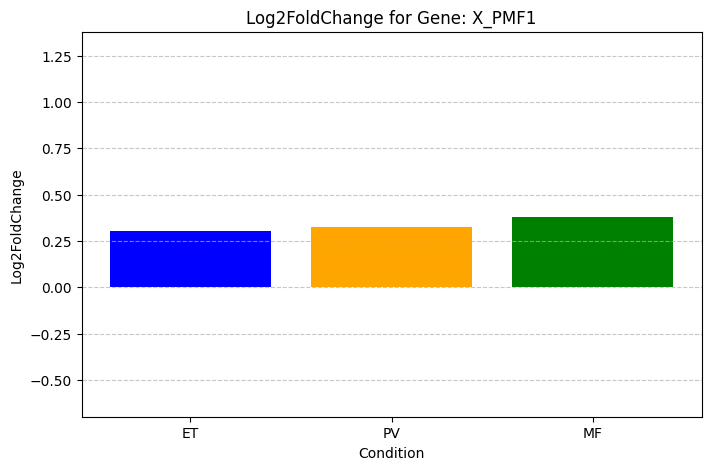

[0.692736568228486, 0.808141727070014, 0.943617896025285]


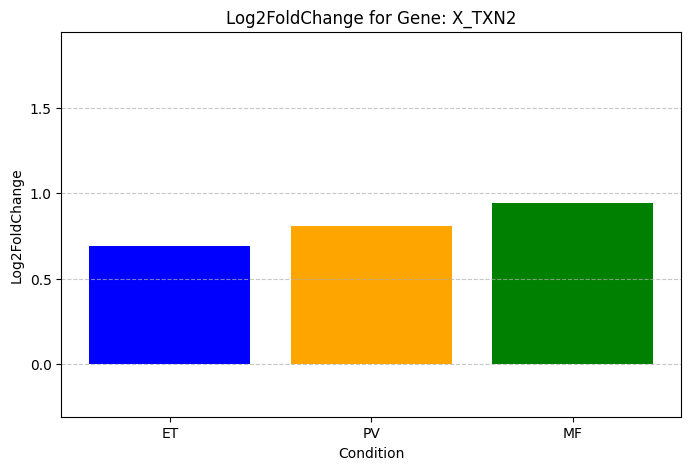

[-0.638251442300672, -0.634903833236146, -0.522947747029206]


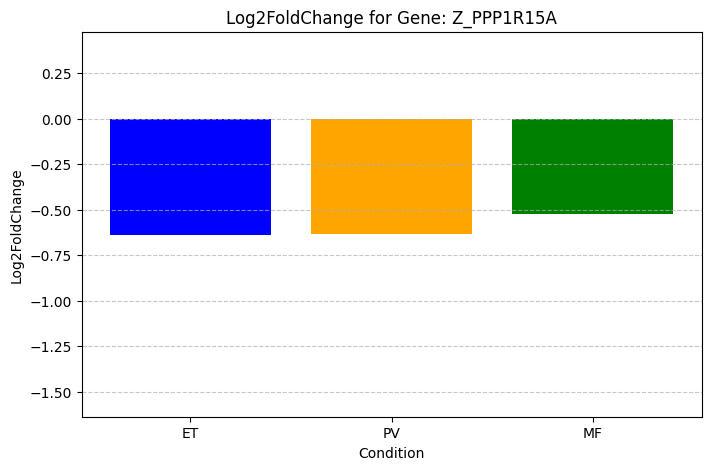

[-0.399566160497273, -0.437407427277752, -0.807368296820482]


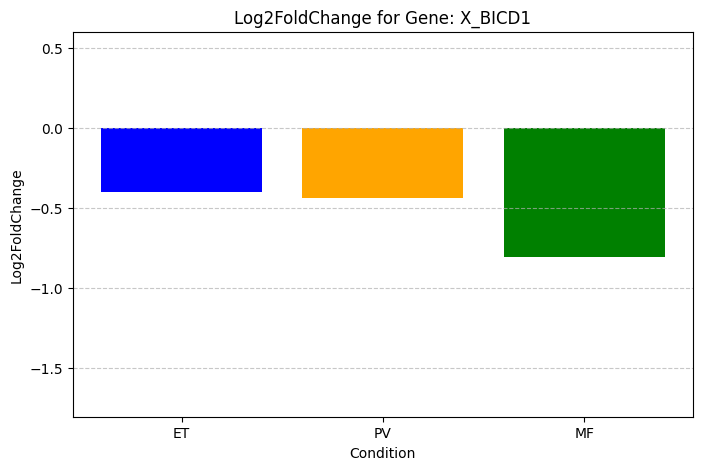

In [44]:
import matplotlib.pyplot as plt
i = 0
count = 21
# Iterate over each gene and plot the log2FoldChange values for PV, ET, and MF
for index, row in stable_genes.iterrows():
    gene = row['Gene']
    log2fold_values = [row['ET_log2FoldChange'], row['PV_log2FoldChange'], row['MF_log2FoldChange']]
    print(log2fold_values)
    pvChange, etChange, mfChange = log2fold_values
    
    # if (abs(etChange)-abs(pvChange))>0 and (abs(mfChange)-abs(etChange)>0) or \
    #     (abs(pvChange)-abs(etChange) and abs(etChange)-abs(mfChange)):
        # continue
        
    conditions = [ 'ET','PV', 'MF']

    plt.figure(figsize=(8, 5))
    plt.bar(conditions, log2fold_values, color=['blue', 'orange', 'green'])
    plt.title(f"Log2FoldChange for Gene: {gene}")
    plt.xlabel("Condition")
    plt.ylabel("Log2FoldChange")
    plt.ylim(min(log2fold_values) - 1, max(log2fold_values) + 1)  # Adjust y-axis for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    i+=1
    if i == count:
        break
    